<b>Loading<b>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [22]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

<b>Train and Test split<b>

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [25]:
y = encoder.fit_transform(y.reshape(-1,1)) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=43)

<b>Model Creation<b>

In [27]:
model = keras.Sequential([
    keras.layers.Dense(16,activation='relu',input_shape=(4,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax')
])

C:\Users\msaak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

<b>Defining Early Stopping condition<b>

In [29]:
earlyStopping = keras.callbacks.EarlyStopping(
    patience=20,
    monitor='val_loss',
    restore_best_weights=True,
)

In [30]:
hist = model.fit(
    xtrain,
    ytrain,
    epochs=250,
    batch_size=32,
    callbacks=[earlyStopping,tensorboard_callback],
    validation_split=0.2,
    verbose=1
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.2956 - loss: 2.6836 - val_accuracy: 0.2917 - val_loss: 2.0413
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.2760 - loss: 2.3831 - val_accuracy: 0.2917 - val_loss: 1.8562
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.2721 - loss: 2.2040 - val_accuracy: 0.2083 - val_loss: 1.6930
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2474 - loss: 2.0599 - val_accuracy: 0.1250 - val_loss: 1.5550
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2135 - loss: 1.9724 - val_accuracy: 0.0833 - val_loss: 1.4408
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.2552 - loss: 1.8692 - val_accuracy: 0.0417 - val_loss: 1.3467
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3034 - loss: 1.8535 - val_accuracy: 0.0417 - val_loss: 1.2700
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3021 - loss: 1.5338 - val_accuracy: 0.2083 - v

<b>Loss and Accuracy<b>

In [31]:
loss,accuracy=model.evaluate(xtest,ytest,verbose=0)
print("Loss:",loss)
print("Accuracy:",accuracy)

Loss: 0.293408066034317
Accuracy: 0.9666666388511658


In [32]:
ypred = model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


<b>Confusion Matrix<b>

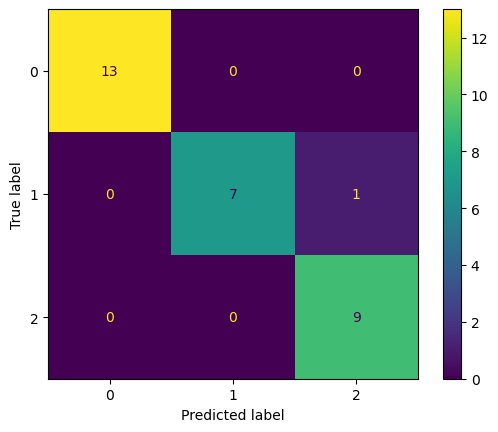

In [33]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
ypredClass = np.argmax(ypred,axis=1)
ytestClass = np.argmax(ytest,axis=1)
ccs = confusion_matrix(ytestClass,ypredClass)
ccm = ConfusionMatrixDisplay(confusion_matrix=ccs)
ccm.plot()

<b>Classification Report<b>

In [34]:
from sklearn.metrics import classification_report
crr = classification_report(ytestClass,ypredClass)
print(crr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93         8
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



<b>Data Visualization<b>

<b>Loss<b>

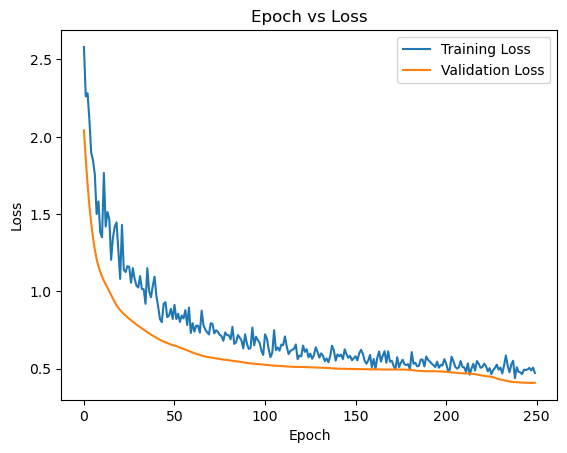

In [35]:
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

<b>Accuracy<b>

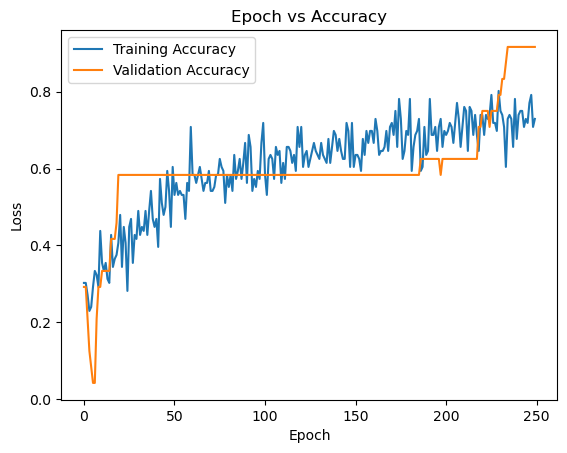

In [36]:
plt.plot(hist.history['accuracy'],label="Training Accuracy")
plt.plot(hist.history['val_accuracy'],label="Validation Accuracy")
plt.title("Epoch vs Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Visualization Using Tensorboard

In [41]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [43]:
python -m tensorboard.main --logdir logs

SyntaxError: invalid syntax (1785911203.py, line 1)